In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user = 'root'
password = 'nats'
host = 'localhost'
port = '3306' 
database = 'BookMate'


In [3]:
# Create the database engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')

In [8]:
query = 'SELECT * FROM book'

In [9]:
df_books = pd.read_sql(query, engine)


In [10]:
def clean_genres(genres):
    # Split genres using '||', strip whitespace and pipes, and filter out empty strings
    return [genre.strip().strip('|') for genre in genres.split('||') if genre.strip().strip('|')]

In [12]:
# Apply the function to the 'genres' column
df_books['genre_list'] = df_books['Genres'].apply(clean_genres)

# Explode the genre_list to have each genre in a separate row
genres_exploded = df_books.explode('genre_list')

# Strip any remaining leading/trailing whitespace and pipes from genres
genres_exploded['genre_list'] = genres_exploded['genre_list'].str.strip('|').str.strip()

In [13]:
genre_counts = genres_exploded['genre_list'].value_counts()

In [20]:
top_genres = genre_counts.head(25)

In [21]:
top_genres

genre_list
Fiction                                  350703
Children's fiction                       152516
General                                  151320
Fiction, romance, general                103357
Fiction - General                         87403
Fiction, general                          74245
Fiction, historical, general              62588
Juvenile Fiction                          54727
Fiction / General                         48046
Fiction, fantasy, general                 46999
General & Literary Fiction                46765
Non-Classifiable                          46534
Juvenile fiction                          44725
Fiction, mystery & detective, general     39448
Fiction - Romance                         32388
Fiction, action & adventure               32142
Romance - General                         30764
Fiction, thrillers, general               29900
Fiction, erotica, general                 27491
Mystery & Detective - General             25202
Modern fiction               

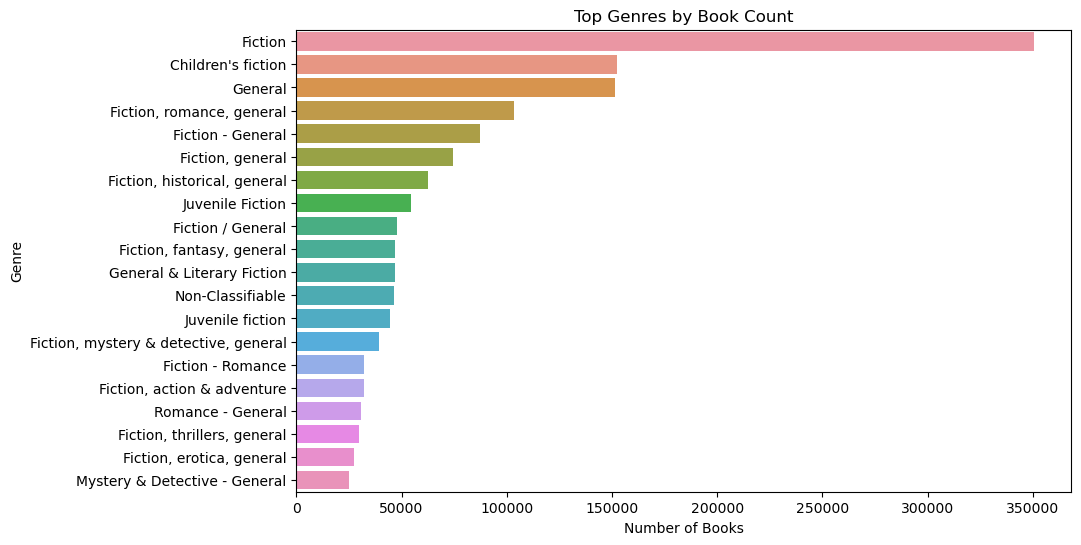

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top Genres by Book Count')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.show()